In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf

In [21]:
def name_ticker_pair():
    pairs = {"silver":"SI=F", 
             "bac":"BAC", 
             "citi":"C", 
             "corn":"ZC=F", 
             "euro":"EURUSD=X", 
             "gold":"GC=F", 
             "iyr":"IYR", 
             "oil":"CL=F", 
             "pound":"GBPUSD=X", 
             "soybns":"ZS=F", 
             "tr5yr":"^FVX", 
             "tr10yr":"^TNX", 
             "wheat":"ZW=F", 
             "yen":"JPY=X"}
    return pairs

In [22]:
bac_yf = yf.download('BAC', start = '2010-01-05', end = '2024-01-22', progress=False)
citi_yf = yf.download('C', start = '2010-01-05', end = '2024-01-22', progress=False)

print(bac_yf.shape, citi_yf.shape)

(3534, 6) (3534, 6)


In [23]:
# get RND stats
bac_rnd = pd.read_csv('data/bac_3.csv')
citi_rnd = pd.read_csv('data/citi_3.csv')

print(bac_rnd.shape, citi_rnd.shape)

(613, 14) (613, 14)


In [24]:
# transform/clean data
bac_rnd['Date'] =pd.to_datetime(bac_rnd['idt'], format='%m/%d/%y')
bac_rnd = bac_rnd.set_index('Date')
bac_rnd.drop('idt',axis= 1, inplace=True)

citi_rnd['Date'] =pd.to_datetime(citi_rnd['idt'], format='%m/%d/%y')
citi_rnd = citi_rnd.set_index('Date')
citi_rnd.drop('idt',axis= 1, inplace=True)

In [25]:
# add two more extreme probability features
bac_rnd['dec_plus_inc'] = bac_rnd['prDec'] + bac_rnd['prInc']
bac_rnd['dec_minus_inc'] = bac_rnd['prDec'] - bac_rnd['prInc']

citi_rnd['dec_plus_inc'] = citi_rnd['prDec'] + citi_rnd['prInc']
citi_rnd['dec_minus_inc'] = citi_rnd['prDec'] - citi_rnd['prInc']


In [26]:
# for BAC:
fut_ret = pd.DataFrame()
for day in range(10,100,10):
    fut_ret[f'{day}day_ret'] =  (bac_yf['Close'].shift(-day) - bac_yf['Close'])/bac_yf['Close']
fut_ret

,10day_ret,20day_ret,30day_ret,40day_ret,50day_ret,60day_ret,70day_ret,80day_ret,90day_ret
Date,,,,,,,,,
2010-01-05,0.017901,-0.041358,-0.019753,0.012346,0.054321,0.113580,0.136420,0.100617,0.008642
2010-01-06,-0.056132,-0.100061,-0.031116,0.018914,0.026236,0.106162,0.122026,0.101891,-0.002440
2010-01-07,-0.119906,-0.113999,-0.042528,-0.011223,0.001772,0.092144,0.099232,0.037212,-0.057885
2010-01-08,-0.107271,-0.137068,-0.050060,0.001192,0.020858,0.109654,0.089392,0.044696,-0.028010
2010-01-11,-0.127584,-0.145304,-0.035440,0.010632,0.037803,0.101595,0.095097,-0.038393,-0.096279
...,...,...,...,...,...,...,...,...,...
2024-01-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
feature = ['mu', 'sd', 'skew', 'kurt', 'p10', 'p50','p90','prDec','prInc','dec_plus_inc', 'dec_minus_inc']
feature_df = bac_rnd[feature].copy()
feature_df.describe()

,mu,sd,skew,kurt,p10,p50,p90,prDec,prInc,dec_plus_inc,dec_minus_inc
count,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000,613.000000
mean,-0.005387,0.150914,-0.556849,1.051346,-0.198459,0.007936,0.168623,0.093237,0.065635,0.158873,0.027602
std,0.007952,0.048331,0.219521,0.460131,0.068411,0.010805,0.047780,0.045057,0.051612,0.094778,0.020125
min,-0.046960,0.094230,-1.196640,0.213820,-0.776080,-0.017250,0.110480,0.027360,0.009180,0.040540,-0.141100
25%,-0.008630,0.120100,-0.718890,0.687390,-0.223270,0.002160,0.138700,0.059570,0.032160,0.093320,0.020250
50%,-0.004210,0.137250,-0.543890,1.009430,-0.179300,0.006560,0.154590,0.081550,0.048900,0.131150,0.027980
75%,-0.000770,0.167710,-0.393420,1.314370,-0.156240,0.012340,0.185590,0.118470,0.083680,0.202180,0.038460
max,0.054560,0.475820,0.220050,2.653120,-0.119170,0.103450,0.491880,0.272370,0.380230,0.638360,0.079670


In [28]:
df = feature_df.merge(fut_ret, left_index=True,right_index=True,how='left')
df

,mu,sd,skew,kurt,p10,p50,p90,prDec,prInc,dec_plus_inc,dec_minus_inc,10day_ret,20day_ret,30day_ret,40day_ret,50day_ret,60day_ret,70day_ret,80day_ret,90day_ret
Date,,,,,,,,,,,,,,,,,,,,
2010-01-15,-0.02514,0.18210,-0.38173,0.85192,-0.25389,-0.01634,0.19272,0.14898,0.09307,0.24205,0.05591,-0.051661,-0.067651,0.012300,0.047356,0.092251,0.193112,0.093481,0.049815,-0.048585
2010-01-29,-0.02194,0.21265,-0.79513,1.61552,-0.28826,0.00001,0.21786,0.16750,0.12009,0.28759,0.04741,-0.048090,0.100790,0.110013,0.188406,0.229908,0.150856,0.130435,0.020422,-0.011199
2010-02-12,-0.01699,0.21625,-0.86181,1.83248,-0.28670,0.00720,0.22358,0.16404,0.12713,0.29117,0.03691,0.156401,0.166090,0.248443,0.292042,0.208997,0.187543,0.071972,0.038754,0.067820
2010-02-26,-0.00965,0.17893,-0.70108,1.40641,-0.23570,0.00776,0.19373,0.12882,0.09233,0.22115,0.03649,0.011405,0.074430,0.120048,0.083433,0.038415,-0.075630,-0.079832,-0.064826,-0.117047
2010-03-15,0.00006,0.17357,-0.71889,1.63480,-0.21657,0.01649,0.19608,0.11325,0.09545,0.20870,0.01780,0.070623,0.108012,0.036795,0.018398,-0.080712,-0.109199,-0.084273,-0.118101,-0.189318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-13,0.00352,0.11858,-0.55862,1.13971,-0.14633,0.01278,0.14065,0.05447,0.03384,0.08831,0.02063,0.057428,0.023720,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-20,0.00081,0.12808,-0.29318,0.71192,-0.16021,0.00599,0.15502,0.06324,0.05067,0.11391,0.01257,0.043966,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-12-27,0.00169,0.12350,-0.40609,0.92177,-0.15376,0.00863,0.14759,0.05846,0.04262,0.10108,0.01584,-0.020390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
corr_df = pd.DataFrame()
for fname in df.columns:
    if fname not in ['10day_ret', '20day_ret', '30day_ret', '40day_ret', '50day_ret','60day_ret','70day_ret','80day_ret','90day_ret']:
        s = pd.Series(dtype=float)
        s['c_10'] = round(df[fname].corr(df["10day_ret"], method='spearman'),3)
        s['c_20'] = round(df[fname].corr(df["20day_ret"],method='spearman'),3)
        s['c_30'] = round(df[fname].corr(df["30day_ret"],method='spearman'),3)
        s['c_40'] = round(df[fname].corr(df["40day_ret"],method='spearman'),3)
        s['c_50'] = round(df[fname].corr(df["50day_ret"],method='spearman'),3)
        s['c_60'] = round(df[fname].corr(df["60day_ret"],method='spearman'),3)
        s['c_70'] = round(df[fname].corr(df["70day_ret"],method='spearman'),3)
        s['c_80'] = round(df[fname].corr(df["80day_ret"],method='spearman'),3)
        s['c_90'] = round(df[fname].corr(df["90day_ret"],method='spearman'),3)
        corr_df[fname] = s

corr_df

,mu,sd,skew,kurt,p10,p50,p90,prDec,prInc,dec_plus_inc,dec_minus_inc
c_10,-0.008,0.061,0.051,-0.029,-0.056,0.011,0.071,0.055,0.074,0.066,-0.078
c_20,-0.022,0.100,0.078,-0.043,-0.092,-0.019,0.117,0.091,0.120,0.107,-0.078
c_30,-0.081,0.158,0.062,-0.029,-0.153,-0.026,0.170,0.151,0.170,0.164,-0.028
c_40,-0.130,0.174,0.062,-0.022,-0.173,-0.057,0.178,0.170,0.180,0.179,0.018
c_50,-0.133,0.189,0.057,-0.009,-0.183,-0.058,0.196,0.181,0.198,0.193,0.015
c_60,-0.130,0.199,0.055,-0.018,-0.191,-0.058,0.210,0.190,0.210,0.203,0.007
c_70,-0.099,0.189,0.056,-0.012,-0.180,-0.061,0.203,0.180,0.205,0.195,-0.015
c_80,-0.107,0.195,0.062,-0.039,-0.190,-0.067,0.207,0.191,0.210,0.203,-0.012
c_90,-0.134,0.209,0.073,-0.055,-0.209,-0.079,0.220,0.209,0.225,0.220,-0.010


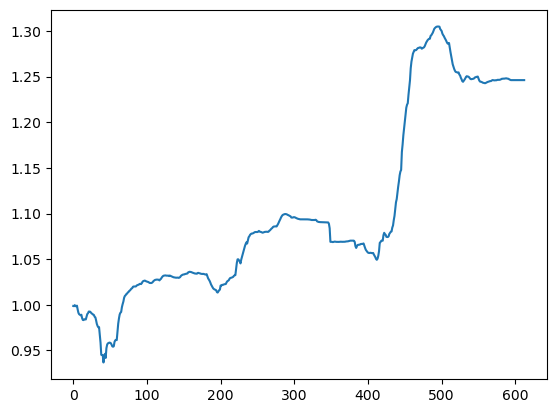

In [30]:
pos = -df['mu']
ret = df['90day_ret'].fillna(0)
cum_ret = (1 + pos * ret).cumprod()
plt.plot(cum_ret.values)

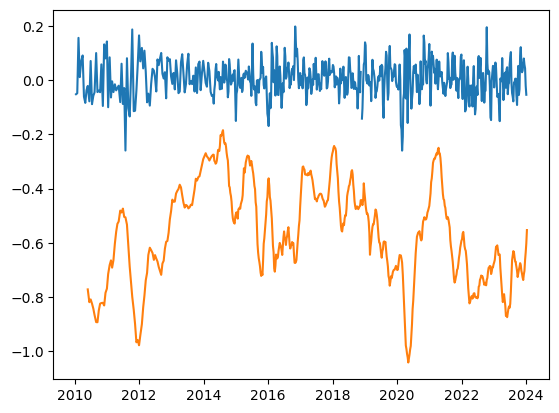

In [50]:
plt.plot(df['10day_ret'])
plt.plot(df['skew'].rolling(10).mean())
plt.show()

In [71]:
import statsmodels.api as sm
import seaborn as sns

select = df[['90day_ret','skew']].copy().dropna()

X = sm.add_constant(select.iloc[:,0])
y = select.iloc[:,1]
model = sm.OLS(y, X)
result = model.fit()
print('Regreesion results:')
print(result.summary())

Regreesion results:
                            OLS Regression Results                            
Dep. Variable:                   skew   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.569
Date:                Sun, 28 Jan 2024   Prob (F-statistic):              0.211
Time:                        20:28:47   Log-Likelihood:                 55.449
No. Observations:                 594   AIC:                            -106.9
Df Residuals:                     592   BIC:                            -98.13
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5574      0.009

In [87]:
from statsmodels.tsa.stattools import grangercausalitytests

test_df = df[['20day_ret','mu']].copy().dropna()
test_df.iloc[:,1] = test_df.iloc[:,1].shift(-1)
test_df.dropna(inplace=True)
gc_res = grangercausalitytests(test_df, 1)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=1.3463  , p=0.2464  , df_denom=603, df_num=1
ssr based chi2 test:   chi2=1.3530  , p=0.2448  , df=1
likelihood ratio test: chi2=1.3515  , p=0.2450  , df=1
parameter F test:         F=1.3463  , p=0.2464  , df_denom=603, df_num=1
